# Assignment A1 [35 marks]

The assignment consists of 3 questions. Each exercise may contain coding and/or discussion questions.
- Type your **code** in the **code cells** provided below each question.
- For **non-code** questions, use the **Markdown cells** provided below each question, indicated by 📝. Double-click these cells to edit them, and run them to display your Markdown-formatted text. Please refer to the Week 1 tutorial notebook for Markdown syntax.

---
## Question 1: Estimating $\pi$ [8 marks]

Consider the 3 following formulas:

$$
\begin{align}
(1) \qquad &\prod_{n=1}^\infty \frac{4n^2}{4n^2-1} = \frac{\pi}{2} \\
(2) \qquad &\sum_{n=0}^\infty \frac{2^n n!^2}{(2n+1)!} = \frac{\pi}{2} \\
(3) \qquad &\sum_{n=1}^\infty \frac{(-1)^{n+1}}{n(n+1)(2n+1)} = \pi - 3
\end{align}
$$

Each of these formulas can be used to compute the value of $\pi$ to arbitrary precision, by computing as many terms of the partial sum or product as are required.

**1.1** Compute the sum or product of the first $m$ terms for each formula, with $m = 1, 2, 3, \dots, 30$.

Present your results graphically, using 2 plots, both with the total number of terms on the x-axis.

- The first plot should display the value of the partial sum or product for different numbers of terms, and clearly indicate the exact value of $\pi$ for reference.
- The second plot should display the absolute value of the error between the partial sum or product and $\pi$, with the y-axis set to logarithmic scale.

**[5 marks]**

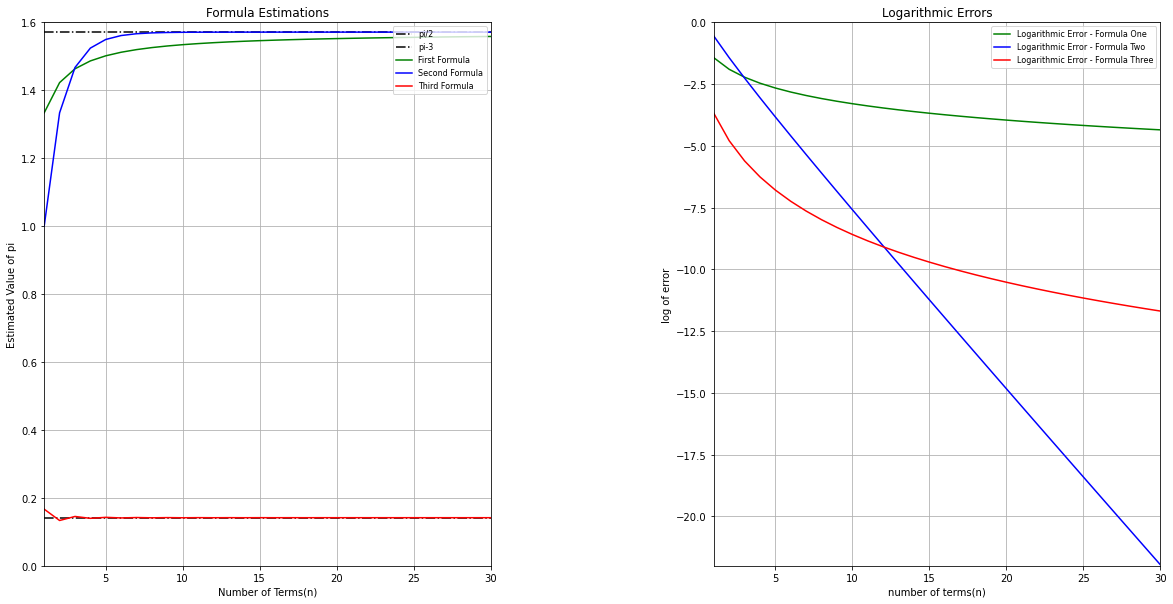

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

'''The following shows the plots for the three formulae.

   The first plot displays the value of the partial sum or product for different numbers of terms, 
   and clearly indicates the exact value of pi for reference.

   The second plot displays the absolute value of the error between the partial sum or product
   and the accurate value that each formula esitmates, with the y-axis set to logarithmic scale.'''

# creates an array of subplots for our functions and their errors
fig, ax = plt.subplots(1,2, figsize=(20,10))

# creates lists of the accurate values of pi/2 and pi-3 to compare against the three formulae
accuratevalue1 = [(np.pi)/2]*30
accuratevalue2 = [(np.pi)-3]*30 

# creates a list of the values of n to plot on x axis
x = np.linspace(1,30, 30) 

# plots each accurate value against x to give a clear comparison for once the formulae are plotted
ax[0].plot(x, accuratevalue1, 'k-', linestyle='dashdot', label='pi/2') # pi/2
ax[0].plot(x, accuratevalue2, 'k-', linestyle='dashdot', label='pi-3') # pi - 3

'''The following is the code for the first formula.'''

# creates an empty list to list values
nlist1=[0]

# sets first term
term1=4/3
nlist1[0]=term1

# creates a loop for remaining terms
for n in range(2,31):
    
    term1=((4*n**2)/((4*n**2)-1)) # calculates current term
    productofterms=term1*(nlist1[n-2]) # multiplies current term with the product of all the previous terms
    nlist1.append(productofterms) # appends the new term to the list

# plots the estimated value against n
ax[0].plot(x, nlist1, 'g-', label='First Formula')

# creates empty lists for the error and log of the error
error1=[0]*30
logerror1=[0]*30

# creates a loops to calculate the error value for each value of n
for i in range(30):

    error1[i]=abs(nlist1[i]-accuratevalue1[i]) # calculates the absolute value of the error
    logerror1[i]=math.log(error1[i]) # calculates the log of this error


# plots the estimated value and the accurate value against n on the same plot
ax[1].plot(x, logerror1, 'g-', label='Logarithmic Error - Formula One')

'''The following is the code for the second formula.'''

# creates an empty list to list values
nlist2=[0]

# sets first term
term2=1
nlist2[0]=term2

# creates a loop for remaining terms
for n in range(1,30):
    
    term2+=((2**n)*((math.factorial(n))**2))/(math.factorial(2*n+1)) # calculates current term as a sum of all previous terms
    nlist2.append(term2) # appends the new term to the list to be plotted

# plots the estimated value against n on the same plot
ax[0].plot(x, nlist2, 'b-', label='Second Formula')

# creates empty lists for the error and log of the error
error2=[0]*30
logerror2=[0]*30

# creates a loops to calculate the error value for each value of n
for i in range(30):

    error2[i]=abs(nlist2[i]-accuratevalue1[i]) #calculates the absolute value of the error
    logerror2[i]=math.log(error2[i]) #calculates the log of this error


# plots the estimated value and the accurate value against n on the same plot
ax[1].plot(x, logerror2, 'b-', label='Logarithmic Error - Formula Two')

'''The following is the code for the third formula.'''

# creates an empty list to list values
nlist3=[0]

# sets first term
term3=1/6
nlist3[0]=term3

# creates a loop for remaining terms
for n in range(2,31):
    
    term3+=((-1)**(n+1))/(n*(n+1)*(2*n+1)) # calculates current term as a sum of all previous terms
    nlist3.append(term3) # appends the new term to the list to be plotted

# plots the estimated value and the accurate value against n on the same plot
ax[0].plot(x, nlist3, 'r-', label= 'Third Formula')

# creates empty lists for the error and log of the error
error3=[0]*30
logerror3=[0]*30

# creates a loops to calculate the error value for each value of n
for i in range(30):

    error3[i]=abs(nlist3[i]-accuratevalue2[i]) #calculates the absolute value of the error
    logerror3[i]=math.log(error3[i]) #calculates the log of this error

# plots the estimated value and the accurate value against n on the same plot
ax[1].plot(x, logerror3, 'r-', label='Logarithmic Error - Formula Three')

'''We will now make tidy the plots up by setting a title, adding a legend, labelling and setting the axes, adding gridlines
   and adjusting the spacing'''

ax[0].set_title('Formula Estimations')
ax[1].set_title('Logarithmic Errors')


# .legend() will use the "label" arguments for each curve on the two plots
ax[0].legend(loc='upper right', fontsize=8)
ax[1].legend(loc='upper right', fontsize=8)

# adjust the x-axis and y-axis limits to tidy the plots
ax[0].set_xlim([1, 30])
ax[0].set_ylim([0, 1.6])
ax[1].set_xlim([1, 30])
ax[1].set_ylim([-22, 0])

# labels the axes of the plots
ax[0].set_xlabel('Number of Terms(n)')
ax[0].set_ylabel('Estimated Value of pi')
ax[1].set_xlabel('number of terms(n)')
ax[1].set_ylabel('log of error')

# displays grid lines
ax[0].grid(True)
ax[1].grid(True)

# adjusts spacing of plots to make it easy to read
plt.subplots_adjust(wspace=0.5)

# shows plots
plt.show()

**1.2** If you did not have access to e.g. `np.pi` or `math.pi`, which of these 3 formulas would you choose to efficiently calculate an approximation of $\pi$ accurate to within any given precision (down to machine accuracy -- i.e. not exceeding $\sim 10^{-16}$)?

Explain your reasoning in your own words, with reference to your plots from **1.1**, in no more than 200 words.

**[3 marks]**

For an iterative formula to provide a good approximation to a value, the error should reduce exponentially,
and the formula will tend to the limit of our desired value.
The log of an exponential function is linear thus we take a log of the error and if we observe that the plot
of the log is linear we should have a good approximation of our desired value.
Thus the formula that provides the best approximation to our value is the one where the logarithmic plot of
the errors is the closest to a linear plot. This is formula two.

In order to avoid an error of more than 10**(-16) we would like the log of the error to be less than -16, which
can clearly be seen to be achieveable with enough terms for formula two.

📝 _Use this cell to answer **1.2**_

---
## Question 2: Numerical Linear Algebra [12 marks]

A **block-diagonal matrix** is a square matrix with square blocks of non-zero values along the diagonal, and zeros elsewhere. For example, the following matrix A is an example of a block-diagonal matrix of size $7\times 7$, with 3 diagonal blocks of size $2\times 2$, $3\times 3$, and $2 \times 2$ respectively:

$$
A =
\begin{pmatrix}
1 & 3 & 0 & 0 & 0 & 0 & 0 \\
2 & 2 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & -1 & 1 & 2 & 0 & 0 \\
0 & 0 & 2 & 1 & 0 & 0 & 0 \\
0 & 0 & 4 & 3 & 3 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 4 & -2 \\
0 & 0 & 0 & 0 & 0 & 5 & 3
\end{pmatrix}.
$$


**2.1** The code below creates a block-diagonal matrix with random non-zero values between 0 and 1, where all blocks have identical size. Study the following documentation sections:

- [`scipy.linalg.block_diag()` - SciPy documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.block_diag.html)
- [`numpy.split()` - NumPy documentation](https://numpy.org/doc/stable/reference/generated/numpy.split.html)
- [Unpacking Argument Lists - Python tutorial](https://docs.python.org/3/tutorial/controlflow.html#unpacking-argument-lists)

Then, write detailed code comments in the cell below to explain **each line** of code, in your own words.

**[3 marks]**

In [2]:
# imports numpy library
import numpy as np 
# imports the block diagonal function from the SciPy library
from scipy.linalg import block_diag

def random_blocks(m, shape):
    '''
    Returns a list of m random matrices of size shape[0] x shape[1].
    '''
    
    # creates a matrix of random numbers 
    # the matrix has (m x (the first element of shape)) rows and (the first element of shape) collumns.
    # in this case mat is a matrix of size (12 x 2)
    mat = np.random.random([m * shape[0], shape[1]])
    
    # splits the matrix, mat, along axis zero (the vertical one) into 4 equal arrays
    # these arrays will have size (12/4) x 2 or equivalently 3 x 2
    blocks = np.split(mat, m)
    
    # returns blocks as the output of the function
    return blocks

# creates a specific set of 'blocks' from specific values which will then be used as the argument below.
blocks = random_blocks(4, (3, 2))

# creates a matrix A which is a block diagonal matrix of the input arrays
# the output is a matrix where the input arrays are displayed along the diagonal and zeros are placed elsewhere
# the argument is given as a list of the arrays, blocks, which the * operator separates and provides to the function
A = block_diag(*blocks)

# uses the numpy rounding feature to round each float type element of the matrix A with more than 3 decimal places to 3 decimal places
print(np.round(A, 3))

[[0.935 0.759 0.    0.    0.    0.    0.    0.   ]
 [0.888 0.336 0.    0.    0.    0.    0.    0.   ]
 [0.604 0.791 0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.874 0.508 0.    0.    0.    0.   ]
 [0.    0.    0.642 0.41  0.    0.    0.    0.   ]
 [0.    0.    0.53  0.693 0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.029 0.532 0.    0.   ]
 [0.    0.    0.    0.    0.044 0.908 0.    0.   ]
 [0.    0.    0.    0.    0.977 0.727 0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.454 0.571]
 [0.    0.    0.    0.    0.    0.    0.122 0.776]
 [0.    0.    0.    0.    0.    0.    0.43  0.505]]


**2.2** For the rest of Question 2, we consider only block-diagonal matrices with $m$ blocks, where all diagonal blocks have the same shape $n \times n$. A block-diagonal system $Ax = b$ can be written as

$$
\begin{pmatrix}
A_{1} & & & \\
& A_{2} & & \\
& & \ddots & \\
& & & A_{m}
\end{pmatrix}
\begin{pmatrix}
x_1 \\ x_2 \\ \vdots \\ x_m
\end{pmatrix}
=
\begin{pmatrix}
b_1 \\ b_2 \\ \vdots \\ b_m
\end{pmatrix}
\qquad \Leftrightarrow \qquad
\begin{cases}
A_{1} x_1 &= b_1 \\
A_{2} x_2 &= b_2 \\
&\vdots \\
A_{m} x_m &= b_m
\end{cases},
$$

where $A_i$ is the $i$th diagonal block of $A$, and $x_i$, $b_i$ are blocks of length $n$ of the vectors $x$ and $b$ respectively, for $i=1, 2, \dots, m$. Note that when $m=1$, this is a diagonal system.

We assume that all diagonal blocks $A_i$ are invertible, and therefore that the matrix $A$ is also invertible.

Write a function `linsolve_block_diag(blocks, b)` which takes 2 input arguments:

- `blocks`, a list of length $m$ storing a collection of $n \times n$ NumPy arrays (e.g. as returned by `random_blocks()` from **2.1**) representing the blocks $A_i$,
- a NumPy vector `b` of length $mn$.

Your function should solve the block-diagonal system $Ax = b$, by solving **each sub-system $A_i x_i = b_i$ separately**, and return the solution as a NumPy vector `x` of length $mn$. You should choose an appropriate method seen in the course (e.g. `np.linalg.solve()`) to solve each sub-system.

**[3 marks]**

In [3]:
def linsolve_block_diag(blocks, b):
    '''
    Solves the block-diagonal system Ax=b,
    where the diagonal blocks are listed in "blocks".
    '''
    # splits vector b into a list of vectors each of (length b)/(the number of input matrices)
    # these vectors will then be used to solve each individual system (A_i)(x_i)=(b_i)
    vectors=np.split(b,(len(blocks)))

    # creates an empty array which we can later append all our solutions into
    x=np.array([])

    # creates a loop to solve each system
    # of which there are (the length of blocks) number of systems to solve
    for i in range(len(blocks)):

        # solves each individual system using the numpy linalg module
        i = np.linalg.solve(blocks[i], vectors[i])
        
        # appends all of our individual solutions together imnto one final vector of length mn 
        x=np.append(x,i)

    # returns desired final vector    
    return x

**2.3** We now wish to compare the computation time needed to solve a block-diagonal system $Ax = b$ using 2 different methods:

- solving the sub-systems one at a time, as in **2.2**,
- solving the full system with a general method, not attempting to take the block-diagonal structure into account.

Consider block-diagonal systems with block sizes $n = 5, 10, 15, 20$, and a total number $m = 5, 10, 15, \dots, 40$ of blocks. For each combination of $n$ and $m$:

- Use the function `random_blocks()` from **2.1** to generate a list of $m$ random matrices of size $n\times n$.
- Use the function `np.random.random()` to generate a random vector `b` of length $mn$.
- Use your function `linsolve_block_diag()` from **2.2** to solve the system $Ax = b$, where $A$ is a block-diagonal matrix of size $mn \times mn$, with diagonal blocks given by the output of `random_blocks()`. Measure the computation time needed to solve the system.
- Use the function `block_diag()` from `scipy.linalg` to form a NumPy array `A` of size $mn \times mn$, representing the block-diagonal matrix $A$.
- Solve the full system $Ax = b$, using the same method you used in **2.2** for each individual sub-system. Measure the computation time needed to solve the system.

Create 4 plots, one for each value of $n$, to compare the computation time needed to solve $Ax=b$ with both methods, and how this varies with the total size of the system.

Summarise and discuss your observations in no more than 200 words.

**[6 marks]**

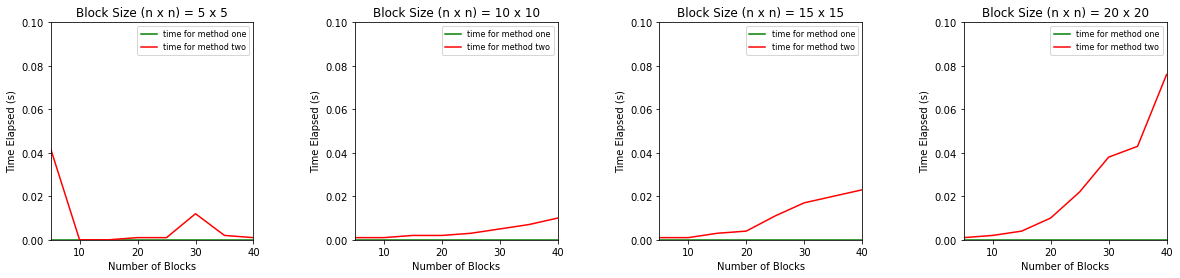

In [4]:
import time

# creates a 1 x 4 array of subplots for our data for each of the four values of n
fig, ax = plt.subplots(1,4, figsize=(20,4))

#adjusts spacing of plots to make it easy to read
plt.subplots_adjust(wspace=0.5)

'''creates a list of the values of n
we create these as a list rather than using a range funtion in order to make it easy 
to assign the different time elapsed vectors to the correct plots'''


# creates a giant for loop to loop through n = 5, 10, 15, 20
# the loop will also simultaneously loop across the four different numbers of subplots in order to assign each plot a different value of n
for n, i in zip(range(5,41,8),range(4)):
        
    # creates empty arrays for which to record the times elapsed by the two different methods for different values of m
    times_elapsed_one=np.array([])
    times_elapsed_two=np.array([])

    # creates a second giant for loop to calculate the times for m = 5, 10, 15, ..., 40 for each above n
    for m in range(5,41,5):
        
        def random_blocks(m, shape):
            '''
            Returns a list of m random matrices of size shape[0] x shape[1].
            '''
            
            # creates a matrix of random numbers 
            # the matrix has (m x (the first element of shape)) rows and (the first element of shape) collumns.
            # in this case mat is a matrix of size (12 x 2)
            mat = np.random.random([m * shape[0], shape[1]])
            
            # splits the matrix, mat, along axis zero (the vertical one) into 4 equal arrays
            # these arrays will have size (12/4) x 2 or equivalently 3 x 2
            blocks = np.split(mat, m)
            
            # returns blocks as the output of the function
            return blocks

        # creates a specific set of m 'blocks' of size n x n
        # we do this for every n value and then for every n we loop through all m values
        # the specific blocks genergated will then be used as the argument below.
        blocks = random_blocks(m, (n, n))

        # reads the shape of each indivual matrix, n, in order to create a random vector of length mn
        shape = np.shape(blocks[0])

        # creates a random vector of length mn where m is the number of elements in the list blocks
        b=np.random.random(len(blocks)*shape[0])

        # records the starting time for method one
        method_one_t0 = time.time()

        def linsolve_block_diag(blocks, b):
            '''
            Solves the block-diagonal system Ax=b,
            where the diagonal blocks are listed in "blocks".
            '''
            # splits vector b into a list of vectors each of (length b)/(the number of input matrices)
            # these vectors will then be used to solve each individual system (A_i)(x_i)=(b_i)
            vectors=np.split(b,(len(blocks)))

            # creates an empty array which we can later append all our solutions into
            x=np.array([])

            # creates a loop to solve each system
            # of which there are (the length of blocks) number of systems to solve
            for i in range(len(blocks)):

                # solves each individual system using the numpy linalg module
                i = np.linalg.solve(blocks[i], vectors[i])
                
                # appends all of our individual solutions together imnto one final vector of length mn 
                x=np.append(x,i)

            # returns desired final vector    
            return x
        
        # computes the total time to execute method one by taking the starting time away from the current time
        time_elapsed_one_m = time.time() - method_one_t0

        # appends the time elapsed for each m to our empty vector in order to be plotted below
        times_elapsed_one=np.append(times_elapsed_one,time_elapsed_one_m)

        '''' 
        Now we solve the system by using the block_diag() function from scipy.linalg to form a NumPy array A of size mn x mn,
        representing the block-diagonal matrix A. We then use the np.linalg.solve() function from np.linalg to solve the system. 
        This is the same function used above, when dealing with indivual blocks.  '''

        # records the starting time for method two
        method_two_t0 = time.time()

        # creates the matrix A, size mn x mn, a block diagonal matrix from the blocks produced by random_blocks()
        A = block_diag(*blocks)
        # solves the system as a whole using the numpy linalg module
        # this is the same function as used above to solve each individual system
        x2= np.linalg.solve(A, b)

        # computes the total time to execute method two by taking the starting time away from the current time
        time_elapsed_two_m = time.time() - method_two_t0

        # appends the time elapsed for each m to our empty vector in order to be plotted below
        times_elapsed_two=np.append(times_elapsed_two,time_elapsed_two_m)

    # creates a vector of the values of m; (5,10,...,40)
    mvector=np.linspace(5,40,8)

    # plots the values of m against the times for each individual method
    # assigns labels to be displayed in the legend
    ax[i].plot(mvector, times_elapsed_one, 'g-', label='time for method one')
    ax[i].plot(mvector, times_elapsed_two, 'r-', label='time for method two')

    # .legend() will use the "label" s above for each curve
    ax[i].legend(loc='upper right', fontsize=8)

    # Adjust the x-axis and y-axis limits to make the plot easier to read
    ax[i].set_xlim([5, 40])
    ax[i].set_ylim([0,0.1])

    #labels the axes
    ax[i].set_xlabel('Number of Blocks')
    ax[i].set_ylabel('Time Elapsed (s)')

# provide titles to secify which value of n we are observing
ax[0].set_title('Block Size (n x n) = 5 x 5')
ax[1].set_title('Block Size (n x n) = 10 x 10')
ax[2].set_title('Block Size (n x n) = 15 x 15')
ax[3].set_title('Block Size (n x n) = 20 x 20')

#shows plots
plt.show()

We see that, for method two there is a general increase in computation time as the number of blocks also increases. This is expected since as block size increases, the overall matrix size increases and in method two the np.linalg.solve() must compute the solution from the whole matrix.

We also see however that the computation time for method one is so small that it appears to be zero on my windows laptop for all values of m and n. The smallest time that the time.time() function can read on a windows laptop is around 1 millisecond. This implies that the computation time for method one is < 0.001 s.
    
While we cannot read specific values of computation time for method one, the lack of any reading large enough to produce a spike on our graph implies that there is no general increasing trend as the number of blocks increases, as we saw in method one. This is expected as the function computes solutions from each individual block, so increasing block numbers does not increase the size of any matrix 
np.linalg.solve must solve.

Overall it is clear to see method one is faster in producing solutions.

📝 _Use this cell to discuss your **2.3** results_

---
## Question 3: Numerical Integration [15 marks]

The integral of the function $f(x,y)= \sin(x) \cos\left(\frac{y}{5}\right)$ defined on the rectangle $\mathcal{D}\in\mathbb{R}^2 = (a,b)\times(c,d)$
can be expressed in closed form as

$$
I = \int_c^{d}\int_a^{b}  \sin(x)\cos\left(\frac{y}{5}\right) \ dx \ dy = 5\left(-\cos(b) + \cos(a)\right)\left(\sin\left(\frac{d}{5}\right) - \sin\left(\frac{c}{5}\right)\right).
$$

for any $a<b$ and $c<d$.

**3.1** Create a surface plot of the function $f(x,y)$ on the interval $(-5, 5) \times (-5, 5)$.

**[3 marks]**

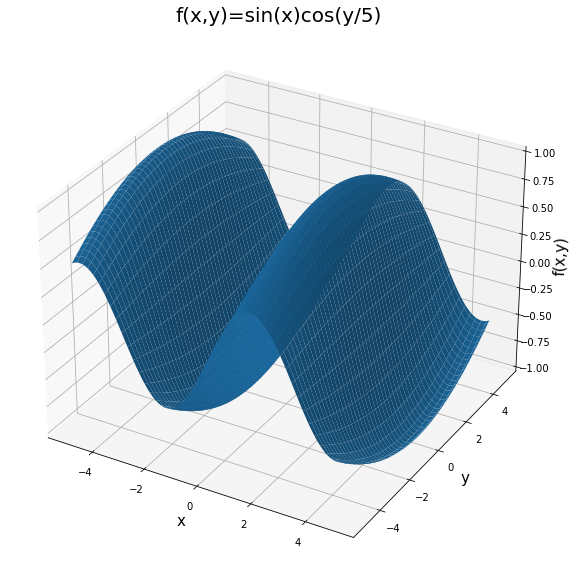

In [5]:
# creates a 3d, empty subplot to later plot our function
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(20,10))

# creates our space over which to plot the function which we set to be the interval [-5,5]x[-5,5]
# we use small intervals (a large number of linearly spaced values), 100, in order to ensure a smooth plot
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)

# the following creates a grid with a point at each integer combination of (x,y) in our interval
x,y = np.meshgrid(x, y)

# Calculates z as the value of our function at each x, y, in the interval
z = (np.sin(x))*(np.cos(y/5))

# plots the surface
surfaceplot = ax.plot_surface(x, y, z)

'''We now set the z axis, and add titles and labels to make the plot easy to read.'''

# sets a title
ax.set_title('f(x,y)=sin(x)cos(y/5)', fontsize=20)

# labels the axes
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_zlabel('f(x,y)', fontsize=15)

# sets the limits of z axis
ax.set_zlim(-1, 1)

'''Finally we show the plot.'''

# shows the plot
plt.show()

**3.2** Write a function `midpoint_I(D, N, M)` which takes 4 input arguments:

- a list `D` of length 4, to store the 4 interval bounds $a, b, c, d$,
- a positive integer `N`,
- a positive integer `M`,

and implements the 2D composite midpoint rule to compute and return an approximation of $I$, partitioning the rectangle $\mathcal{D}$ into $N\times M$ rectangles. (This translates to `N` nodes on the x-axis and `M` nodes on the y-axis.

You will need to adapt the 1D composite midpoint rule seen in Weeks 5 and 6 to extend it to 2 dimensions. Instead of approximating the integral by computing the sum of the surface areas of $N$ rectangles, you will need to sum the volumes of $N \times M$ cuboids.

**[3 marks]**

In [11]:
'''We start by creating the function we are integrating as this allows us to evalualuate f(x,y) at our different nodes.'''

def f(x,y):
    return np.sin(x)*np.cos(y/5)

'''We can now create our integrating function.'''

def midpoint_I(D,N,M):

    '''We start by creating the nodes. We want to calculate the spacing between the x nodes as the width of our x interval divided
       by the number of x partitions we are looking to evaluate the integral over, in this case N.'''

    h = (D[1]-D[0]) / N

    # since we are evaluating at midpoints our x nodes are then spaced at this width, h.
    # again since we are evaluating at midpoints the nodes start at +/- 0.5*h from our end points 
    x_node = np.linspace(D[0] + 0.5*h, D[1] - 0.5*h, N)

    # we do the same for our y interval and y nodes
    w = (D[3]-D[2]) / M
    y_node = np.linspace(D[2] + 0.5*h, D[3] - 0.5*h, M)
    
    # we will sum all volumes
    # these will be obtained by the value of f(x,y) at each x_node, y_node combination
    # we start by settting the all_volumes to be 0 in order to allow us to sum the volumes later
    all_volumes = 0

    '''We now create a for loop that will sum across all y_nodes for each x_node.'''
    for i in range(N):

        # sums the volume of the cuboid under each x_node for all the corresponding y_nodes
        x_volumes=np.sum(f(x_node[i],y_node)*w*h)
        
        # sums all the above volumes to obtain the total approximation
        all_volumes+=x_volumes

    return all_volumes

**3.3** Consider now the domain $\mathcal{D} = (0, 5)\times(0, 5)$. Compute the absolute error between the exact integral $I$ and the approximated integral computed with your `midpoint_I()` function from **3.2**, with all combinations of $M = 5, 10, 15, \dots, 300$ and $N = 5, 10, 15, \dots, 300$.

Store the error values in a $60\times 60$ NumPy array.

**[3 marks]**

In [14]:
from scipy import integrate

# first print a statement to warn user of lengthy computation time
print('WARNING: Due to the sheer number of computations involved the following may take up to a minute but will produce the desired output.')

# we compute the exact integral in order to later calculate the error
# we use the scipy dblquad() method over the specified interval D(0,5)x(0,5)
# note this returns the exact integral and the estimate of its absolute error so we will later call only I_exact[0]
I_exact=integrate.dblquad(f,0,5,0,5)

# we create an empty array of size 60 x 60 in order to later fill in the error values
errorvalues=np.zeros([60,60])

'''We now create a double for loop with zipped ranges. This is because we want every combination of M,N, this is hit by
   the double for loop. Then for each M we want the element in our array to be the M/5-1 element and similary for N, thus
   we can use zipped ranges'''

for M, r in zip(range(5,300,5), range(60)):
    
    for N, c in zip(range(5,300,5), range(60)):

        # we then calculate each element in our errorvalues array as thee absolute value of our estimation minus the exact integral
        errorvalues[r,c]=abs(midpoint_I([0,5,0,5],M,N)-I_exact[0])

**3.4** Display the absolute error values as a function of $N$ and $M$ using a contour plot, with contour levels at $10^{-k}, k = 1, 2, \dots, 5$.

You may find the documentation for [`contour()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.contour.html#matplotlib.pyplot.contour), [`contourf()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.contourf.html#matplotlib.pyplot.contourf), and [colormap normalization](https://matplotlib.org/stable/tutorials/colors/colormapnorms.html#logarithmic) useful to clearly display your results.

**[3 marks]**

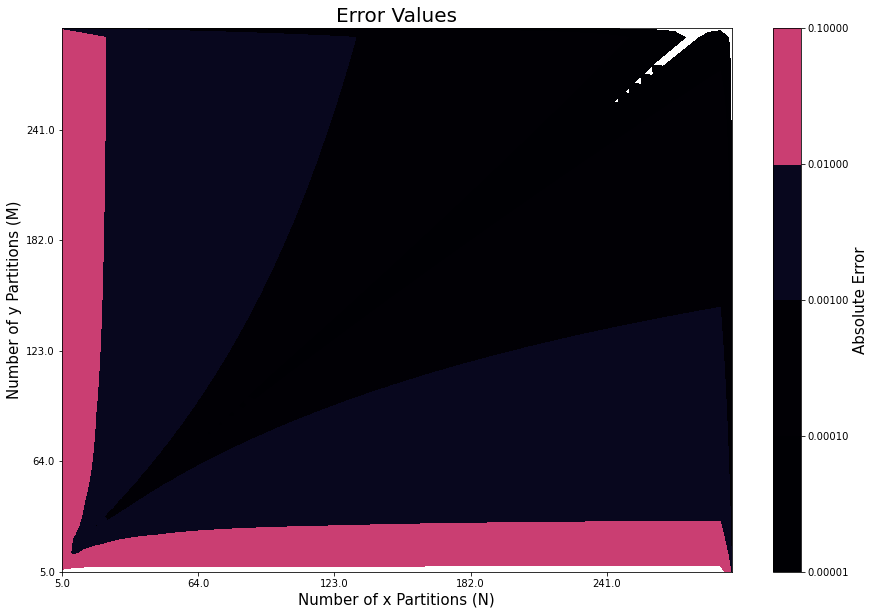

In [15]:
from matplotlib.ticker import FixedLocator

# create an empty subplot to later display our contour plot
fig, ax = plt.subplots(figsize=(15,10))

# we create a list of our levels to later plot our contours at
levels=[10**(-5),10**(-4),10**(-3),10**(-2),10**(-1)]

# uses the matplotlib contour function to plot the errorvalues array
# levels uses our levels list to plot each of the errors across our chosen contours
# the argument cmap allows us to select a suitable colourmap
# here we have chosen the colour map 'magma' as it is sequential and has an obvious colour gradient 
cs = ax.contourf(errorvalues,levels=levels,cmap='magma')

'''We now set the limits of the x and y axes, and add a title, labels and a colour bar to make the plot easy to read.'''

# sets a title
ax.set_title('Error Values', fontsize=20)

# adds a colour bar
bar=fig.colorbar(cs)

# labels the axes and colour bar
# the axes represent the element of the matrix which corresponds to M/5-1 and N/5-1 respectively
ax.set_xlabel('Number of x Partitions (N)', fontsize=15)
ax.set_ylabel('Number of y Partitions (M)', fontsize=15)
bar.set_label('Absolute Error', fontsize=15)

# sets the limits of x and y axes
ax.set_xlim(0,59)
ax.set_ylim(0,59)

'''We now change the x and y axes tick labels from the row and collumn number of the matrix to the values of the N and M partitions.
   We are spacing the values 5 through to 300 over 6 intervals, thus each interval is of size 59.'''

# first specify the tick locations
ticklocations=np.linspace(0,60,6)
ax.xaxis.set_major_locator(FixedLocator(ticklocations))
ax.yaxis.set_major_locator(FixedLocator(ticklocations))

# create a vector of the partition number of our domain
partitions=np.linspace(5,300,6)

# assign the above vector as the new x tick labels
ax.set_xticklabels(partitions)
ax.set_yticklabels(partitions)

'''Finally we show the plot.'''

# shows the plot
plt.show()

**3.5** Summarise and explain your observations from **3.4** in no more than 250 words. In particular, discuss how $\mathcal{D}$ should be partitioned to approximate $I$ with an error of at most $10^{-4}$, and comment on the symmetry or asymmetry of the partitioning.

**[3 marks]**

📝 _Use this cell to answer **3.5**_

In order to avoid an error of more than 10**(-4) we want to avoid all combinations of N,M that appear pink on the above chart or any combinations that appear white in the bottom strip (below the pink) as here white specifies errors larger than the levels that we have plotted over. Note that, following the trend, the white in the top right corner specifies errors smaller than the levels we have plotted over so here we can allow these partitionings.

The smaller errors as we approach the line N=M of our chart show that when D is partitioned equally along the x and y axes we obtain better approximations for our integral. This is because when we split the domain d, the more equal the partitioning of the two axes, the closer the individual surface areas of our partitions are to squares. This means that the distance from our midpoint to the extremity of our small area is minimised and thus provides the closest approximation to the volume under the function across that region. Hence why the more symmetric partitioning provides smaller absolute errors.